In [311]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [312]:
df = pd.read_csv('data VGML.csv')
df2 = pd.read_csv('data not VGML.csv')
df3 = pd.read_csv('data NULL.csv')

In [313]:
df = df.sample(20000, random_state=111)
df2 = df2.sample(10000, random_state=111)
df3 = df3.sample(10000, random_state=111)

In [314]:
df['target'] = 1
df2['target'] = 0
df3['target'] = 0

In [315]:
data = pd.concat([df, df2, df3], ignore_index=True)
data['LDEPTIME_LOCAL'] = pd.to_datetime(data['LDEPTIME_LOCAL'])

In [316]:
data.columns

Index(['DV_LEG_H_ID', 'DV_SEGMENT_H_ID', 'ALDES', 'FLTNBR', 'FLTDATE_LOCAL',
       'LDEPTIME_LOCAL', 'DEPSTN', 'ARRSTN', 'ARR_COUNTRY', 'AIRCRAFT_SUBTYPE',
       'AIRCRAFT_REGISTRATION', 'IS_FPLUS', 'SERVICE_CLASS', 'GENDER2',
       'NATIONALITY', 'ROUTE_TYPE', 'FLIGHT_DURATION', 'POINT_OF_SALE',
       'SSR_SEAT_MEAL', 'SSR_CODE', 'target'],
      dtype='object')

In [317]:
data = data.drop(columns=['DV_LEG_H_ID', 'DV_SEGMENT_H_ID','DEPSTN', 'ALDES', 'AIRCRAFT_REGISTRATION', 'AIRCRAFT_SUBTYPE',  'FLTDATE_LOCAL', 'NATIONALITY', 'SSR_CODE', 'SSR_SEAT_MEAL'])

In [318]:
data

,FLTNBR,LDEPTIME_LOCAL,ARRSTN,ARR_COUNTRY,IS_FPLUS,SERVICE_CLASS,GENDER2,ROUTE_TYPE,FLIGHT_DURATION,POINT_OF_SALE,target
0,145,2019-02-04 18:40:00,BKK,Thailand,True,ECONOMY,Male,LH,575,EE,1
1,151,2020-01-17 19:25:00,HKT,Thailand,True,ECONOMY,Female,LH,605,FI,1
2,85,2019-06-18 18:20:00,PEK,China,False,ECONOMY,Female,LH,455,BE,1
3,131,2018-07-28 23:55:00,SIN,Singapore,False,ECONOMY,Male,LH,695,AU,1
4,77,2019-04-07 17:20:00,KIX,Japan,False,ECONOMY,Male,LH,575,DE,1
...,...,...,...,...,...,...,...,...,...,...,...
39995,1365,2018-05-30 16:05:00,MAN,United Kingdom,False,ECONOMY,Child,SH,175,TH,0
39996,1381,2018-07-30 08:20:00,DUB,Ireland Republic of,True,ECONOMY,Male,SH,190,FI,0
39997,1511,2018-11-30 07:55:00,ZRH,Switzerland,True,BUSINESS,Male,SH,170,FI,0
39998,887,2018-09-02 15:50:00,UME,Sweden,False,ECONOMY,Female,SH,80,DE,0


### Gender filtering

In [319]:
data = data[data.GENDER2.isin(['Male', 'Female'])]
data['GENDER2'] = data['GENDER2'] == 'Male'

<ipython-input-319-244760341a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GENDER2'] = data['GENDER2'] == 'Male'


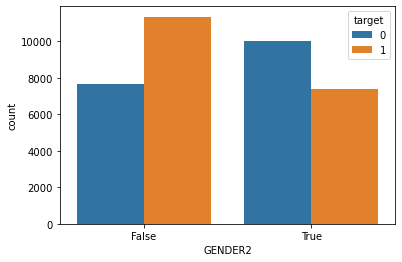

In [320]:
sns.countplot(x='GENDER2', hue='target', data=data)

### Nationalities > 100 filtering

In [321]:
nationality_table = data[['POINT_OF_SALE', 'FLTNBR']].groupby('POINT_OF_SALE').count().sort_values('FLTNBR', ascending=False)
nationalities = nationality_table[nationality_table.FLTNBR > 100].index.values
data = data[data.POINT_OF_SALE.isin(nationalities)]

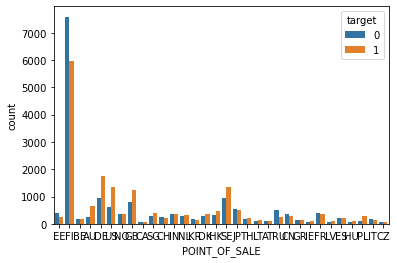

In [322]:
sns.countplot(x='POINT_OF_SALE', hue='target', data=data)

### Filtering ARR_COUNTRY

In [323]:
country_table = data[['ARR_COUNTRY', 'FLTNBR']].groupby('ARR_COUNTRY').count().sort_values('FLTNBR', ascending=False)
countries = country_table[country_table.FLTNBR > 40].index.values
data = data[data.ARR_COUNTRY.isin(countries)]

data = data.drop(columns=['ARRSTN'])

In [324]:
data

,FLTNBR,LDEPTIME_LOCAL,ARR_COUNTRY,IS_FPLUS,SERVICE_CLASS,GENDER2,ROUTE_TYPE,FLIGHT_DURATION,POINT_OF_SALE,target
0,145,2019-02-04 18:40:00,Thailand,True,ECONOMY,True,LH,575,EE,1
1,151,2020-01-17 19:25:00,Thailand,True,ECONOMY,False,LH,605,FI,1
2,85,2019-06-18 18:20:00,China,False,ECONOMY,False,LH,455,BE,1
3,131,2018-07-28 23:55:00,Singapore,False,ECONOMY,True,LH,695,AU,1
4,77,2019-04-07 17:20:00,Japan,False,ECONOMY,True,LH,575,DE,1
...,...,...,...,...,...,...,...,...,...,...
39994,321,2019-02-11 23:55:00,Finland,True,ECONOMY,True,SH,55,FI,0
39996,1381,2018-07-30 08:20:00,Ireland Republic of,True,ECONOMY,True,SH,190,FI,0
39997,1511,2018-11-30 07:55:00,Switzerland,True,BUSINESS,True,SH,170,FI,0
39998,887,2018-09-02 15:50:00,Sweden,False,ECONOMY,False,SH,80,DE,0


### SERVICE_CLASS Filtering

In [325]:
data = data[data.SERVICE_CLASS.isin(['ECONOMY', 'BUSINESS'])]
data['SERVICE_CLASS'] = data['SERVICE_CLASS'] == 'BUSINESS'

<ipython-input-325-ecfcc59e0fd6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SERVICE_CLASS'] = data['SERVICE_CLASS'] == 'BUSINESS'


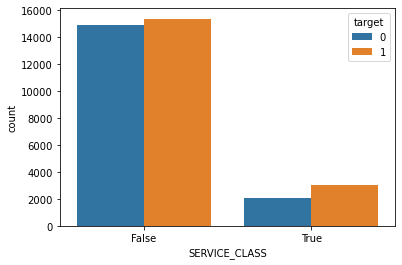

In [326]:
sns.countplot(x='SERVICE_CLASS', hue='target', data=data)

### FLIGHT_DURATION Filtering

<ipython-input-327-41031a5899d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FLIGHT_DURATION'] = data['FLIGHT_DURATION'] / 60


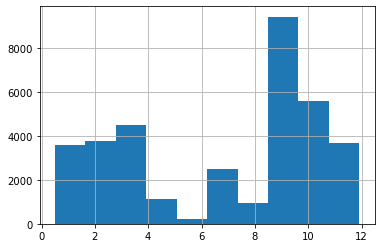

In [327]:
data['FLIGHT_DURATION'] = data['FLIGHT_DURATION'] / 60
data['FLIGHT_DURATION'].hist()

### ROUTE_TYPE Filtering

<ipython-input-328-47a3cd7e3105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ROUTE_TYPE'] = data['ROUTE_TYPE'] == 'LH'


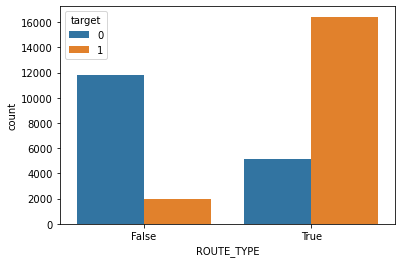

In [328]:
data['ROUTE_TYPE'] = data['ROUTE_TYPE'] == 'LH'
sns.countplot(x='ROUTE_TYPE', hue='target', data=data)

### LDEPTIME_LOCAL Filtering

In [329]:
data['IS_DAYTIME'] = data['LDEPTIME_LOCAL'].apply(lambda x: x.hour >= 6 and x.hour <= 18)
data['SEASON'] = data['LDEPTIME_LOCAL'].apply(lambda x: (x.month % 12) // 3)

<ipython-input-329-4f572dc22df1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IS_DAYTIME'] = data['LDEPTIME_LOCAL'].apply(lambda x: x.hour >= 6 and x.hour <= 18)
<ipython-input-329-4f572dc22df1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SEASON'] = data['LDEPTIME_LOCAL'].apply(lambda x: (x.month % 12) // 3)


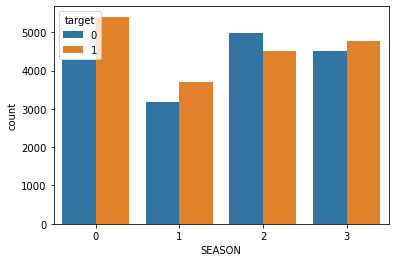

In [330]:
sns.countplot(x='SEASON', hue='target', data=data)

In [331]:
data = data.drop(columns=['FLTNBR', 'LDEPTIME_LOCAL'])

In [279]:
data

,ARR_COUNTRY,IS_FPLUS,SERVICE_CLASS,GENDER2,ROUTE_TYPE,FLIGHT_DURATION,POINT_OF_SALE,target,IS_DAYTIME,SEASON
0,Thailand,True,False,True,True,9.583333,EE,1,True,0
1,Thailand,True,False,False,True,10.083333,FI,1,False,0
2,China,False,False,False,True,7.583333,BE,1,True,2
3,Singapore,False,False,True,True,11.583333,AU,1,False,2
4,Japan,False,False,True,True,9.583333,DE,1,True,1
...,...,...,...,...,...,...,...,...,...,...
39994,Finland,True,False,True,False,0.916667,FI,0,False,0
39996,Ireland Republic of,True,False,True,False,3.166667,FI,0,True,2
39997,Switzerland,True,True,True,False,2.833333,FI,0,True,3
39998,Sweden,False,False,False,False,1.333333,DE,0,True,3


### Categorical features encoding

In [332]:
labels = data[['target']]
data = data.drop(columns=['target'])

In [333]:
train_data = pd.get_dummies(data, columns=['POINT_OF_SALE', 'ARR_COUNTRY', 'SEASON'])

X = train_data.values
y = labels.values

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111, test_size = 0.2) 

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (28277, 81)
y_train shape: (28277, 1)
X_test shape: (7070, 81)
y_test shape: (7070, 1)


In [335]:
model = RandomForestClassifier()

np.random.seed(1111)

model.fit(X_train, y_train)

<ipython-input-335-b7d2024ef527>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

In [336]:
print(f"Accuracy of RF {model.score(X_test, y_test)*100}%")

Accuracy of RF 80.31117397454031%


In [337]:
predictions = model.predict(X_test)

In [338]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [339]:
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[2377 1011]
 [ 381 3301]]


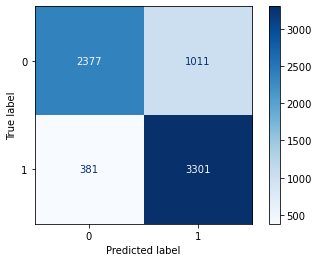

In [340]:
disp = plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)


In [341]:
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]

In [342]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 4 (0.337739)
2. feature 3 (0.152546)
3. feature 1 (0.135186)
4. feature 2 (0.027312)
5. feature 0 (0.026989)
6. feature 47 (0.023745)
7. feature 71 (0.014580)
8. feature 58 (0.014096)
9. feature 80 (0.013638)
10. feature 73 (0.012910)
11. feature 5 (0.012824)
12. feature 78 (0.012246)
13. feature 79 (0.012205)
14. feature 77 (0.012011)
15. feature 17 (0.010135)
16. feature 68 (0.009360)
17. feature 51 (0.009340)
18. feature 19 (0.007932)
19. feature 34 (0.007124)
20. feature 13 (0.006452)
21. feature 7 (0.006359)
22. feature 67 (0.006307)
23. feature 37 (0.005818)
24. feature 40 (0.005455)
25. feature 18 (0.004701)
26. feature 49 (0.004638)
27. feature 14 (0.004517)
28. feature 24 (0.004467)
29. feature 31 (0.004314)
30. feature 59 (0.004242)
31. feature 26 (0.004211)
32. feature 50 (0.004080)
33. feature 30 (0.004051)
34. feature 15 (0.003990)
35. feature 21 (0.003624)
36. feature 11 (0.003566)
37. feature 33 (0.003539)
38. feature 16 (0.003523)
39. feature

In [343]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = train_data.columns,
                                    columns=['importances']).sort_values('importances', ascending=False)
display(feature_importances.head(15))

,importances
FLIGHT_DURATION,0.337739
ROUTE_TYPE,0.152546
SERVICE_CLASS,0.135186
GENDER2,0.027312
IS_FPLUS,0.026989
ARR_COUNTRY_Finland,0.023745
ARR_COUNTRY_Thailand,0.014580
ARR_COUNTRY_Japan,0.014096
SEASON_3,0.013638
ARR_COUNTRY_USA,0.012910


In [344]:
from matplotlib import pyplot

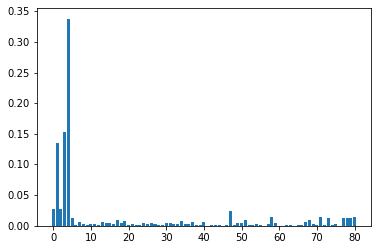

In [345]:
pyplot.bar([x for x in range(len(importances))], importances)
pyplot.show()

In [346]:
from sklearn.metrics import precision_recall_fscore_support

In [347]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, predictions))
print ('F1 score:', f1_score(y_test, predictions))
print ('Recall:', recall_score(y_test, predictions))
print ('Precision:', precision_score(y_test, predictions))
print ('\n clasification report:\n', classification_report(y_test,predictions))
print ('\n confussion matrix:\n',confusion_matrix(y_test, predictions))

Accuracy: 0.8031117397454031
F1 score: 0.8258694020515387
Recall: 0.896523628462792
Precision: 0.7655380333951762

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      3388
           1       0.77      0.90      0.83      3682

    accuracy                           0.80      7070
   macro avg       0.81      0.80      0.80      7070
weighted avg       0.81      0.80      0.80      7070


 confussion matrix:
 [[2377 1011]
 [ 381 3301]]


### Data preprocesing automotization

In [348]:
def preprocess_data(df, nationalities, countries):
    df['target'] = df['SSR_CODE'] == 'VGML'
    df = df.drop(columns=['DV_LEG_H_ID', 'DV_SEGMENT_H_ID', 'ALDES','DEPSTN', 'AIRCRAFT_REGISTRATION', 'AIRCRAFT_SUBTYPE',  'FLTDATE_LOCAL', 'NATIONALITY', 'SSR_CODE', 'SSR_SEAT_MEAL'])
    df['LDEPTIME_LOCAL'] = pd.to_datetime(df['LDEPTIME_LOCAL'])
    
    df = df[df.GENDER2.isin(['Male', 'Female'])]
    df['GENDER2'] = df['GENDER2'] == 'Male'
    
    df = df[df.POINT_OF_SALE.isin(nationalities) & (df.ARR_COUNTRY.isin(countries))]
    
    df = df.drop(columns=['ARRSTN'])
    
    df = df[df.SERVICE_CLASS.isin(['ECONOMY', 'BUSINESS'])]
    df['SERVICE_CLASS'] = df['SERVICE_CLASS'] == 'BUSINESS'
    
    df['FLIGHT_DURATION'] = df['FLIGHT_DURATION'] / 60
    
    df['ROUTE_TYPE'] = df['ROUTE_TYPE'] == 'LH'
    
    df['IS_DAYTIME'] = df['LDEPTIME_LOCAL'].apply(lambda x: x.hour >= 6 and x.hour <= 18)
    df['SEASON'] = df['LDEPTIME_LOCAL'].apply(lambda x: (x.month % 12) // 3)
    
    df = df.drop(columns=['FLTNBR', 'LDEPTIME_LOCAL'])
    
    df = pd.get_dummies(df, columns=['POINT_OF_SALE', 'ARR_COUNTRY', 'SEASON'])
    
    labels = df[['target']].astype('int32')
    df = df.drop(columns=['target'])
    
    return df, labels

In [349]:
test_data = pd.read_csv('ALL.csv').sample(15000)
test_preprocessed_data, test_labels = preprocess_data(test_data, nationalities, countries)

C:\Users\AY54025\Anaconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [350]:
test_preprocessed_data

,IS_FPLUS,SERVICE_CLASS,GENDER2,ROUTE_TYPE,FLIGHT_DURATION,IS_DAYTIME,POINT_OF_SALE_AT,POINT_OF_SALE_AU,POINT_OF_SALE_BE,POINT_OF_SALE_CA,...,ARR_COUNTRY_Thailand,ARR_COUNTRY_Turkey,ARR_COUNTRY_USA,ARR_COUNTRY_United Arab Emirates,ARR_COUNTRY_United Kingdom,ARR_COUNTRY_Viet Nam,SEASON_0,SEASON_1,SEASON_2,SEASON_3
275830,False,False,True,False,1.333333,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
77112,False,False,True,False,4.666667,True,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
84927,True,False,True,False,0.916667,True,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
78666,False,True,False,False,3.083333,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
313188,False,False,True,False,1.500000,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242491,False,False,True,False,1.000000,True,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34032,False,False,False,False,1.333333,True,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
53412,True,False,False,False,1.666667,True,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
361097,True,False,True,False,1.333333,True,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [351]:
X = test_preprocessed_data.values
y = test_labels.values

In [352]:
print(f"Accuracy of RF on unseen data: {model.score(X, y)*100}%")

Accuracy of RF on unseen data: 79.02926711279528%


In [251]:
[f for f in train_data.columns.tolist() if f not in test_preprocessed_data.columns.tolist()]

['ARR_COUNTRY_Belarus', 'ARR_COUNTRY_Bulgaria']

# -------------------------------

In [353]:
test_df = pd.read_csv('data VGML.csv').sample(10000)
test_df2 = pd.read_csv('data not VGML.csv').sample(5000)
test_df3 = pd.read_csv('data NULL.csv').sample(5000)

In [354]:
test_data = pd.concat([test_df, test_df2, test_df3], ignore_index=True)
test_preprocessed_data, test_labels = preprocess_data(test_data, nationalities, countries) 

In [355]:
X = test_preprocessed_data.values
y = test_labels.values

In [356]:
print(f"Accuracy of RF on unseen data: {model.score(X, y)*100}%")

Accuracy of RF on unseen data: 83.88687372477897%


# -------------------------------

In [357]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6)

np.random.seed(1111) 
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [358]:
print(f"Accuracy of DT on unseen data: {model_dt.score(X, y)*100}%")

Accuracy of DT on unseen data: 83.16141464520517%


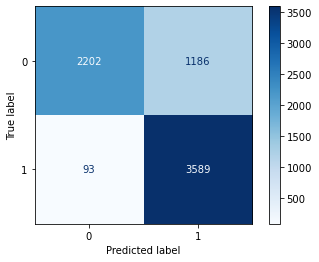

In [359]:
disp = plot_confusion_matrix(model_dt, X_test, y_test, cmap=plt.cm.Blues)

In [360]:
feature_importances = pd.DataFrame(model_dt.feature_importances_,
                                   index = train_data.columns,
                                    columns=['importances']).sort_values('importances', ascending=False)
print(feature_importances)

                                   importances
FLIGHT_DURATION                       0.722241
SERVICE_CLASS                         0.231087
GENDER2                               0.016706
POINT_OF_SALE_JP                      0.005043
POINT_OF_SALE_IN                      0.003875
...                                        ...
ARR_COUNTRY_Estonia                   0.000000
ARR_COUNTRY_Finland                   0.000000
POINT_OF_SALE_CA                      0.000000
ARR_COUNTRY_Greece                    0.000000
ARR_COUNTRY_Hong Kong (SAR) China     0.000000

[81 rows x 1 columns]


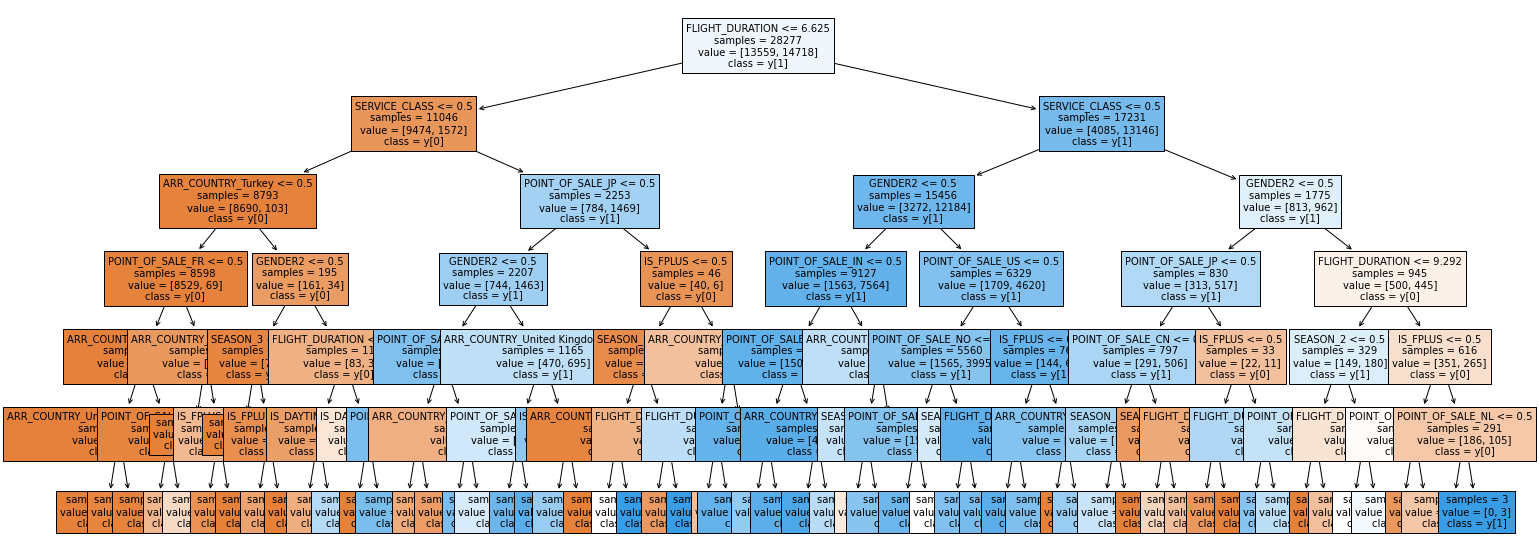

In [361]:
from sklearn.tree import plot_tree

plt.figure(figsize = (25, 10))
plot_tree(model_dt, feature_names=train_data.columns,class_names=True, impurity=False, fontsize = 10, filled = True)
plt.show()

In [362]:
prediction=model_dt.predict(X_test)

In [363]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print ('Accuracy:', accuracy_score(y_test, prediction))
print ('F1 score:', f1_score(y_test, prediction))
print ('Recall:', recall_score(y_test, prediction))
print ('Precision:', precision_score(y_test, prediction))
print ('\n clasification report:\n', classification_report(y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, prediction))

Accuracy: 0.8190947666195191
F1 score: 0.8487643372354262
Recall: 0.9747419880499728
Precision: 0.7516230366492147

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.65      0.77      3388
           1       0.75      0.97      0.85      3682

    accuracy                           0.82      7070
   macro avg       0.86      0.81      0.81      7070
weighted avg       0.85      0.82      0.81      7070


 confussion matrix:
 [[2202 1186]
 [  93 3589]]
